## HW4

### Задание 1
1. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.
2.1. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.

In [3]:
with open('Harry_Potter_and_the_Sorcerers_Stone.txt','r', encoding='utf-8') as Harry1:
    text = Harry1.read()

#к нижнему регистру:
text = text.lower()

#чистка текста от пунктуации:
import re
text = text.split()
punct = "!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"
np = []
for word in text:
    word = word.strip(punct)
    np.append(word)
text = ' '.join(np)



In [4]:
#лемматизация текста
from nltk import WordNetLemmatizer
wnl = WordNetLemmatizer()
lmtzd = []
for word in np:
    word = wnl.lemmatize(word, pos = 'v')
    word = wnl.lemmatize(word, pos = 'a')
    word = wnl.lemmatize(word, pos = 'n')
    lmtzd.append(word)
newtext= " ".join(lmtzd)

In [5]:
#создание нового файла, запись полученного результата:
with open ('Harry.txt', 'w', encoding = 'utf-8') as f:
    f.write(" ".join(lmtzd))

2.2. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [6]:
dict = {}
for word in lmtzd:
    if word in dict:
        dict[word]+=1
    else: 
        dict[word]=1
sor=sorted(dict.items(), key=lambda x: x[1], reverse = True)   

In [7]:
y = sorted([i/len(lmtzd) for i in dict.values()], reverse = True)

In [10]:
x = [x for x in range (0,len(dict))]

In [11]:
import matplotlib
import matplotlib.pyplot as plt

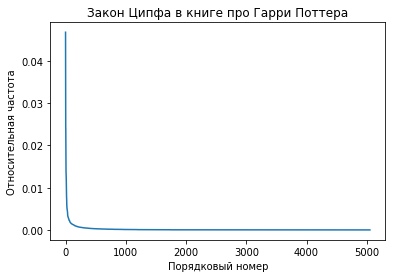

In [12]:
plt.plot(x, y)
plt.xlabel("Порядковый номер")
plt.ylabel("Относительная частота")
plt.title('Закон Ципфа в книге про Гарри Поттера')
plt.show()

Таким образом, Закон Ципфа доказан.

3. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [15]:
from nltk.corpus import stopwords
sw= stopwords.words('english')


In [16]:
from nltk.tokenize import word_tokenize #токенизация
filtered = [w for w in word_tokenize(newtext) if w not in sw]
ftext=" ".join(filtered)


In [17]:
from collections import Counter
counts = Counter(ftext.split()) #отсортированный по частотности список слов


In [18]:
mostcommon = counts.most_common(30)

In [19]:
x = []
for i in range(0,30):
    x.append(i)

In [20]:
y = [w[1] for w in mostcommon]

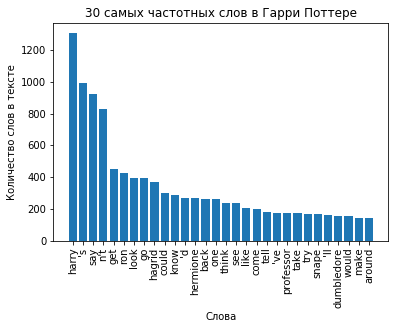

In [21]:
plt.xticks(x, [w[0] for w in mostcommon],rotation=90)
plt.bar([w[0] for w in mostcommon],[w[1] for w in mostcommon])
plt.title("30 самых частотных слов в Гарри Поттере")
plt.xlabel("Cлова")
plt.ylabel("Количество слов в тексте")
plt.show()